# House Price EDA and Prediction

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

Importing the required libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xg
from lightgbm import LGBMRegressor

Importing the Dataset

In [119]:
train_data = pd.read_csv(r'C:\Datasets\house-prices-advanced-regression-techniques\train.csv')
test_data = pd.read_csv(r'C:\Datasets\house-prices-advanced-regression-techniques\test.csv')

In [120]:
train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
344,345,160,RM,36.0,2592,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,85000
336,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,377426
1173,1174,50,RL,138.0,18030,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,200500
683,684,20,RL,90.0,11248,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,285000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000


## Exploratory Data Analysis

In [121]:
combined=[train_data,test_data]

# Data set observe
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print(dataframe.quantile([0, 0.25, 0.50, 0.75, 1]).T)

In [122]:
for dataset in combined:
    print(check_df(dataset))
    print('-'*30)

##################### Shape #####################
(1460, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
##################### Head #####################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

In [123]:
train_data.isnull().sum()
print("Shape of training Data",train_data.isnull().sum())
print("Shape of test Data",test_data.isnull().sum())


Shape of training Data Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Shape of test Data Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [124]:
print("Shape of training Data",train_data.shape)
print("Shape of test Data",test_data.shape)

Shape of training Data (1460, 81)
Shape of test Data (1459, 80)


In [125]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


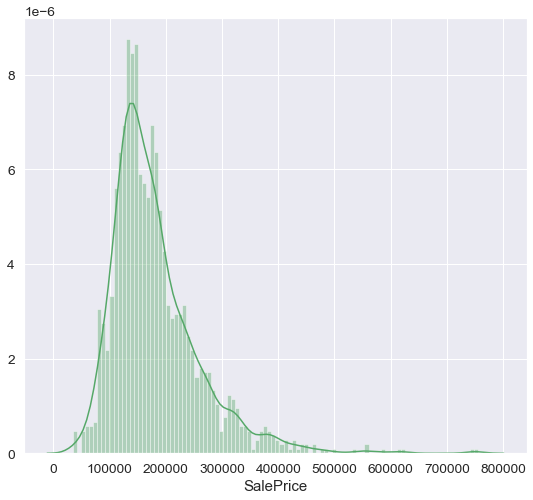

In [126]:
print(train_data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [127]:
#missing data for training data set
total = train_data.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [128]:
#missing data for test data
total = test_data.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageCond,78
GarageQual,78
GarageYrBlt,78
GarageFinish,78


Text(0.5, 1.0, 'Percent missing data by columns')

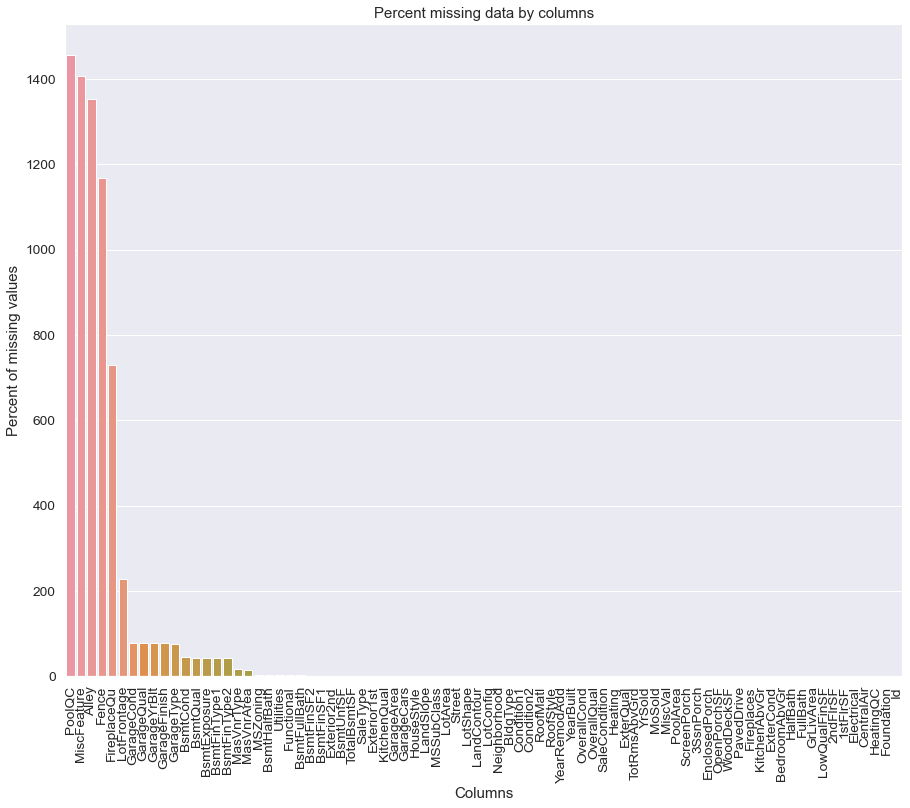

In [129]:
#visulize missing value using sns plot
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=total.index, y=total)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by columns', fontsize=15)

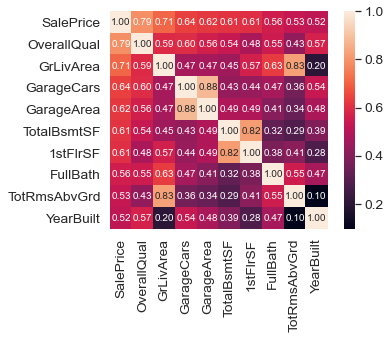

In [130]:
#correlation matrix
corrmat = train_data.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

More than 50% of data are missing for PoolQC, MiscFeature, Alley, Fence. So, we can drop the dataframe. Few data frame is uncorrelated, so we can drop them too.



In [131]:
train_data.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType'], axis=1 ,inplace=True)
test_data.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType'], axis=1 ,inplace=True)

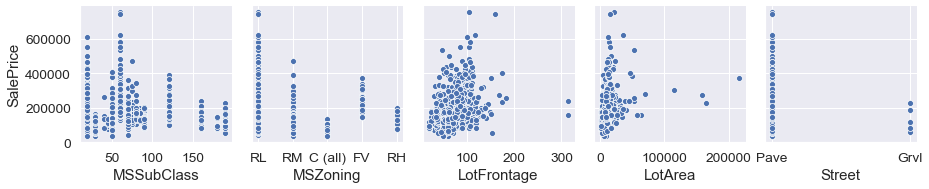

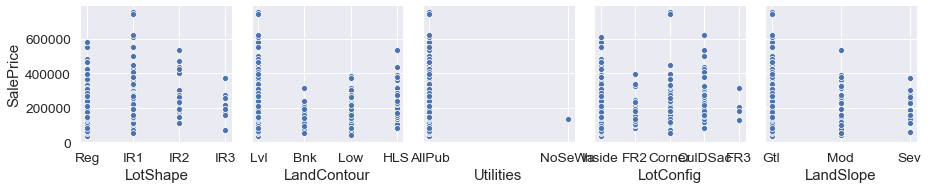

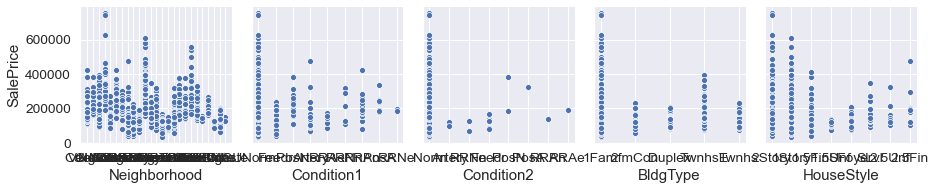

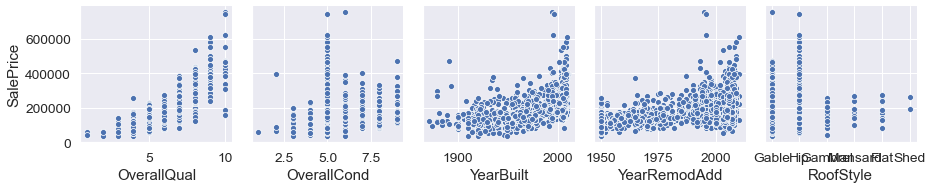

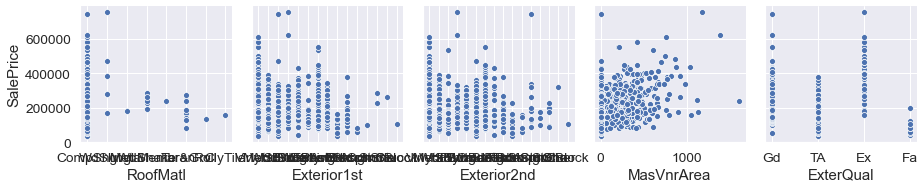

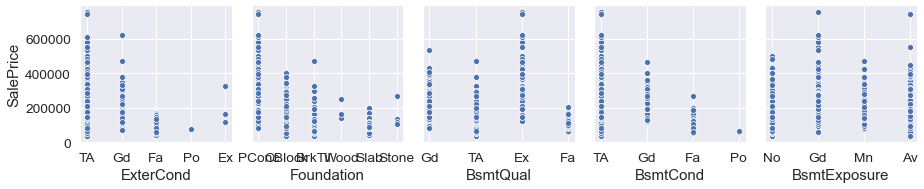

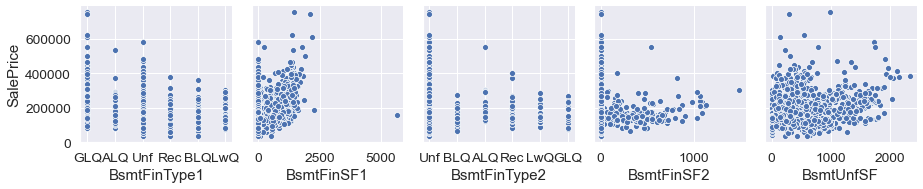

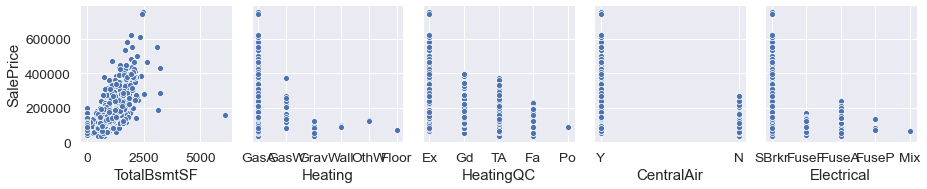

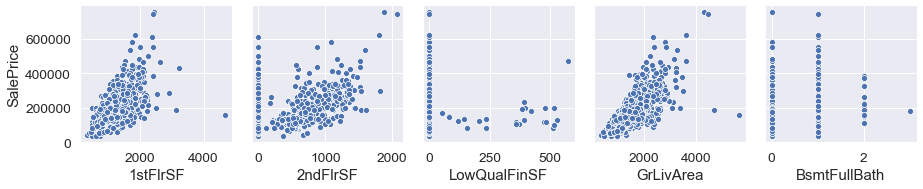

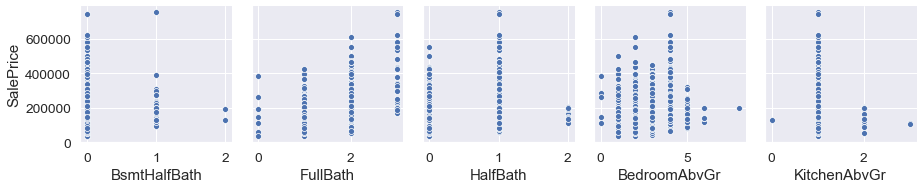

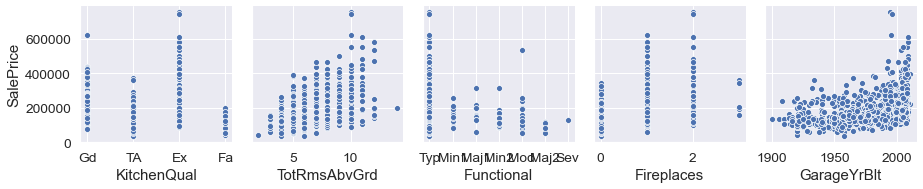

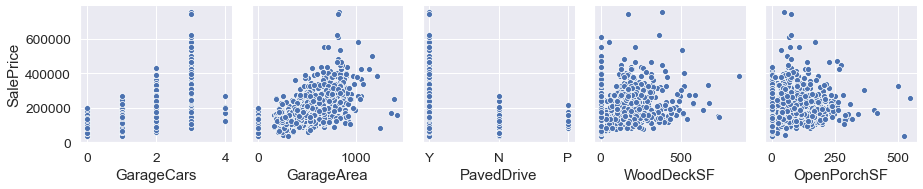

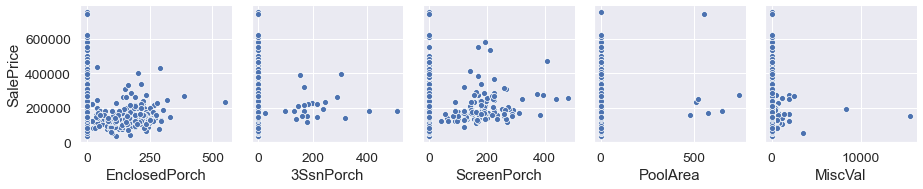

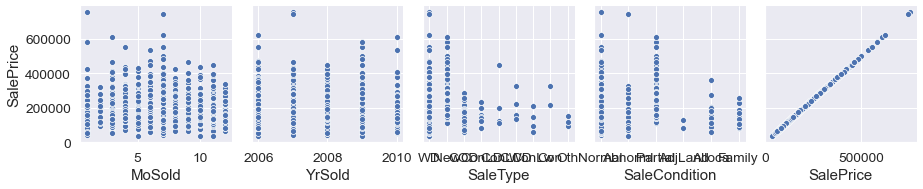

In [132]:
##  Scatterplot for numerical features
for i in range(0, len(train_data.columns), 5):
    sns.pairplot(data=train_data,
                x_vars=train_data.columns[i:i+5],
                y_vars=['SalePrice'])

Outliers visualization:

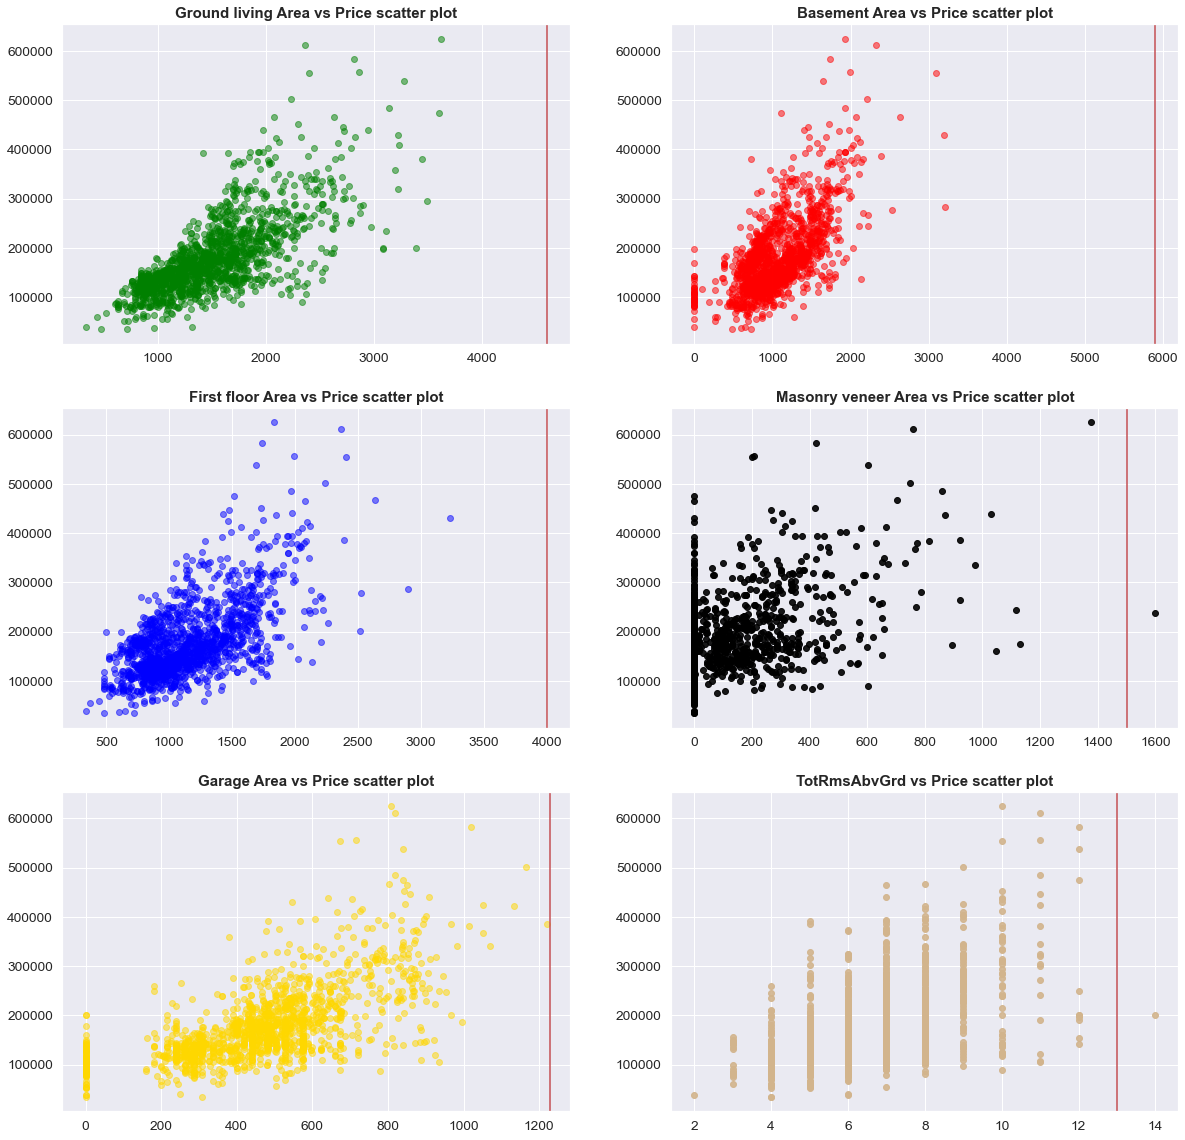

In [166]:
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'], color=('green'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area vs Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area vs Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=train_data['1stFlrSF'], y=train_data['SalePrice'], color=('blue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area vs Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=train_data['MasVnrArea'], y=train_data['SalePrice'], color=('black'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area vs Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=train_data['GarageArea'], y=train_data['SalePrice'], color=('gold'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area vs Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=train_data['TotRmsAbvGrd'], y=train_data['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd vs Price scatter plot', fontsize=15, weight='bold' )
plt.show()

In [134]:
# missing value treatment for continuous variable
for col in ('LotFrontage','GarageYrBlt','GarageCars','BsmtFinSF1','TotalBsmtSF','GarageArea','BsmtFinSF2','BsmtUnfSF','LotFrontage','GarageYrBlt','BsmtFullBath','BsmtHalfBath'):
    train_data[col]=train_data[col].fillna(train_data[col].mean())
    test_data[col]=test_data[col].fillna(test_data[col].mean())

In [135]:
# missing value treatment for categorical variable
for col in ('BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'Electrical','Exterior2nd','Exterior1st','KitchenQual','Functional','SaleType','Utilities','MSZoning','BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'Electrical'):
    test_data[col]=test_data[col].fillna(test_data[col].mode()[0])
    train_data[col]=train_data[col].fillna(train_data[col].mode()[0])

In [136]:
train_data.isnull().sum().max()

0

In [137]:
test_data.isnull().sum().max()

0

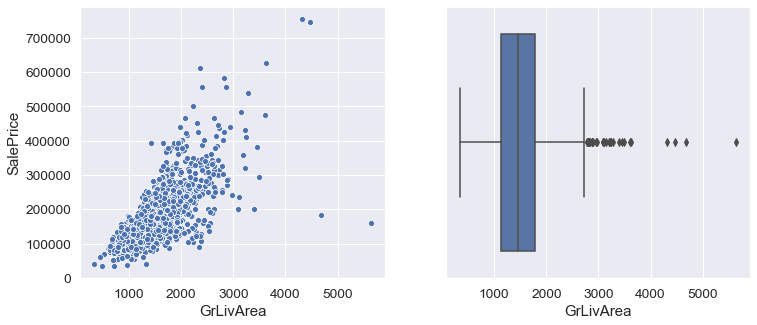

In [138]:
#Plots for detecting outliers in important feature
fig, axes = plt.subplots(1,2, figsize=(12,5))

ax1= sns.scatterplot(x='GrLivArea', y='SalePrice', data= train_data,ax=axes[0])
ax2= sns.boxplot(x='GrLivArea', data= train_data,ax=axes[1])

In [139]:
#removing outliers 
train_data= train_data[train_data['GrLivArea']<4000]


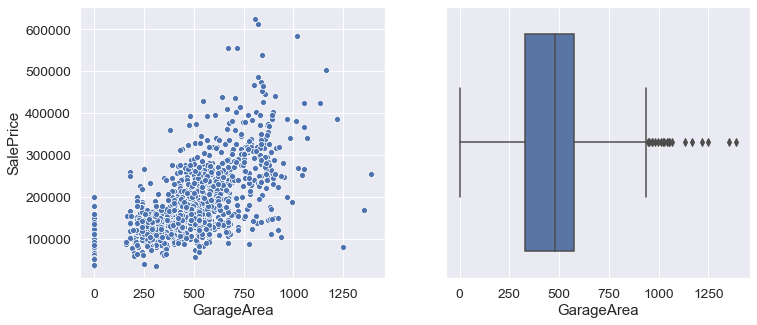

In [140]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

ax1= sns.scatterplot(x='GarageArea', y='SalePrice', data= train_data,ax=axes[0])
ax2= sns.boxplot(x='GarageArea', data= train_data,ax=axes[1])

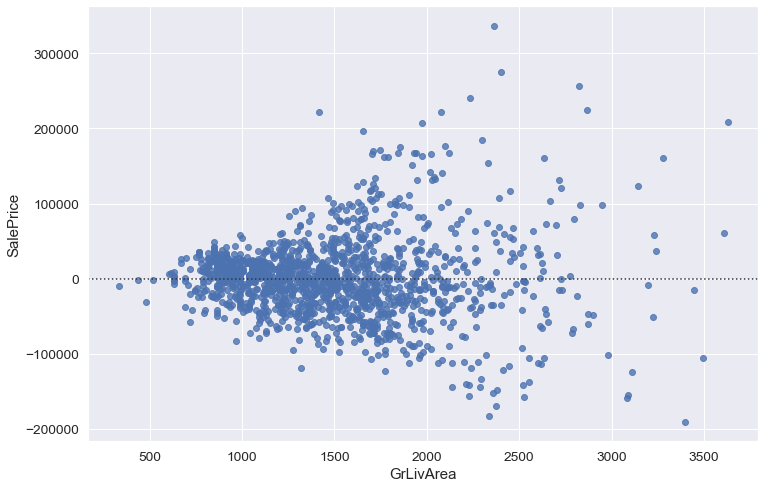

In [141]:
plt.subplots(figsize = (12,8))
sns.residplot(train_data.GrLivArea, train_data.SalePrice);

In [142]:
# Removing outliers manually (More than 1000 sqft, less than $300k)
train_data = train_data.drop(train_data[(train_data['GarageArea']>1000) 
                         & (train_data['SalePrice']<300000)].index).reset_index(drop=True)

In [143]:
#Numerical variable which are actually categorical
train_data['MSSubClass'] = train_data['MSSubClass'].apply(str)
train_data['YrSold'] = train_data['YrSold'].astype(str)

test_data['MSSubClass'] = test_data['MSSubClass'].apply(str)
test_data['YrSold'] = test_data['YrSold'].astype(str)

In [144]:
#Extracting the categorical column from train and test data for label encoding.
categorial_train = train_data.select_dtypes(include=[np.object])
categorial_train.head(5)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,GasA,Ex,Y,SBrkr,TA,Typ,Y,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,GasA,Gd,Y,SBrkr,Gd,Typ,Y,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,2008,WD,Normal


In [145]:
categorial_test = test_data.select_dtypes(include=[np.object])
categorial_test.head(5)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,YrSold,SaleType,SaleCondition
0,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,GasA,TA,Y,SBrkr,TA,Typ,Y,2010,WD,Normal
1,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,GasA,TA,Y,SBrkr,Gd,Typ,Y,2010,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,GasA,Gd,Y,SBrkr,TA,Typ,Y,2010,WD,Normal
3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,2010,WD,Normal
4,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,2010,WD,Normal


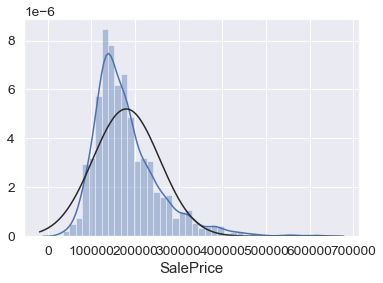

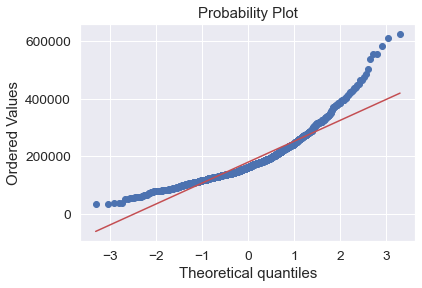

In [146]:
#histogram and normal probability plot
sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

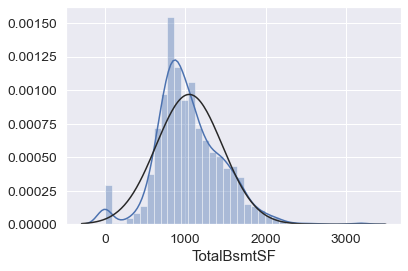

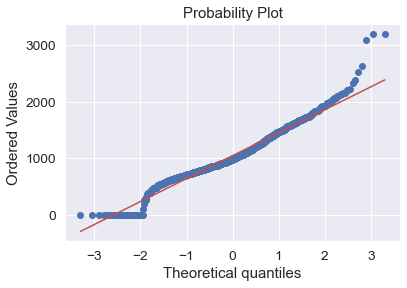

In [147]:
#histogram and normal probability plot
sns.distplot(train_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'], plot=plt)

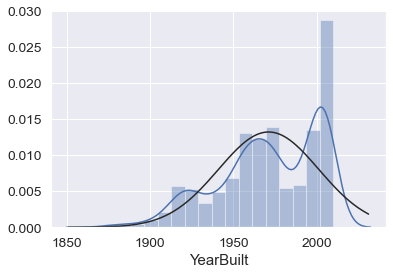

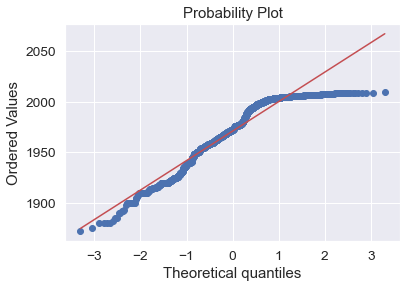

In [148]:
#histogram and normal probability plot
sns.distplot(train_data['YearBuilt'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['YearBuilt'], plot=plt)

In [149]:
##Label Encoding for training data
  
le = LabelEncoder()

label_encoders = {}
for column in categorial_train:
    label_encoders[column] = LabelEncoder()
    train_data[column] = label_encoders[column].fit_transform(train_data[column]) 

In [150]:
##Label Encoding for test data  

label_encoders = {}
for column in categorial_test:
    label_encoders[column] = LabelEncoder()
    test_data[column] = label_encoders[column].fit_transform(test_data[column]) 

Preparing the data for training the model

In [151]:
# dividing into dependent and independent variable data set
x_train = train_data.drop('SalePrice', axis = 1)
y_train = train_data['SalePrice']

In [152]:
x_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,9,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2,8,4
1,4,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,1,8,4
2,9,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2,8,4
3,10,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,0,8,0
4,9,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2,8,4


## Machine Learning Models 

Linear Regression 

In [153]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [154]:
model1.score(x_train,y_train)

0.900629363374045

XGBoost Model

In [155]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE


model2 = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 100) 
  
# Fitting the model 
model2.fit(x_train,y_train) 
model2.score(x_train,y_train)
  

[19:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.9651142592026464

Gradient boosting

In [156]:
model3=GradientBoostingRegressor(n_estimators=2000,learning_rate=0.1,criterion='mse',min_samples_leaf=15, min_samples_split=10, )
model3.fit(x_train,y_train)
model3.score(x_train,y_train)

0.9990755282715507

Descision Tree Regressor

In [157]:
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10,random_state = 0)  
  
model4.fit(x_train,y_train)
model4.score(x_train,y_train)

0.7750741011668574

In [158]:
#Using GridSearchCV to get best parameters for our model
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }



grid_cv_regressor = GridSearchCV(model4, param_grid, cv=5)

grid_cv_regressor.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5,
                                             random_state=0),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [159]:
grid_cv_regressor.score(x_train,y_train)

0.8653564418431167

In [160]:
print("R-Squared on train dataset for Linear Regression model={}".format(model1.score(x_train,y_train)))

print("R-Squared on train dataset for XGBoost Model={}".format(model2.score(x_train,y_train)))
print("R-Squared on train dataset for Gradient Boosting={}".format(model3.score(x_train,y_train)))
print("R-Squared on train dataset for  Decision Tree Regressor={}".format(model4.score(x_train,y_train)))

R-Squared on train dataset for Linear Regression model=0.900629363374045
R-Squared on train dataset for XGBoost Model=0.9651142592026464
R-Squared on train dataset for Gradient Boosting=0.9990755282715507
R-Squared on train dataset for  Decision Tree Regressor=0.7750741011668574


LGBM Regressor

In [161]:
model5 = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.05, 
                                       n_estimators=5000, 
                                       max_bin=100, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.1, 
                                       )

In [162]:
model5.fit(x_train,y_train)
model5.score(x_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


0.990718738874316

In [163]:
Linear_Regression_model=model1.predict(test_data)
XGB_model=model2.predict(test_data)
Gradient_model=model3.predict(test_data)
Descision_Tree=model4.predict(test_data)
LGBM_Regressor=model5.predict(test_data)

In [164]:
Linear_Regression_model

array([128018.83165702, 162202.00459618, 180739.69254782, ...,
       162336.84433089, 128341.77176286, 239322.72333564])

In [165]:
#we take an average of predictions from all the models and use it to make the final prediction
final_prediction = ((XGB_model+Linear_Regression_model+Gradient_model+Descision_Tree+LGBM_Regressor)/5)
final_prediction

array([124570.79501848, 158104.30267797, 179381.56611234, ...,
       157464.90375941, 119944.02078289, 222248.66678719])